# **Lab 3: Support Vector Machine (Soft Margin and Kernel)**

# **This lab is 3% of total lab weight**

# **What is Support Vector Machine**

Support Vector Machines (SVM) are supervised learning models used primarily for classification tasks. The core idea of SVM is to find a hyperplane that best separates data points from different classes in a high-dimensional space. The goal is to maximize the margin between the hyperplane and the closest points from each class. These closest points are called support vectors, as they "support" the hyperplane.

* **Linear SVM:** In the case of linearly separable data, a linear SVM can find a hyperplane that perfectly divides the data into two classes. For 2D data, this hyperplane is a line, while in higher dimensions, it becomes a plane (or a hyperplane).

**Soft Margin Support Vector Machine:** This is an extension of the basic linear SVM, which allows some misclassifications to create a more flexible decision boundary. In real-world datasets, it’s often impossible to perfectly separate the classes using a straight line (or hyperplane in higher dimensions). Instead of demanding a perfect separation, a soft margin SVM finds a compromise by allowing certain data points to be misclassified or to lie within the margin.

**Key Concepts:**

* **Margin:**The distance between the hyperplane and the nearest data points (support vectors). The goal of SVM is to maximize this margin.

* **Slack Variables (ξ):** These variables represent the degree to which data points violate the margin. If a data point lies within the margin or is misclassified, the slack variable corresponding to that point is non-zero.

* **Regularization Parameter (C):** The soft margin introduces a trade-off between the width of the margin and the number of classification errors. This trade-off is controlled by the regularization parameter
𝐶. It penalizes misclassifications. A large C tries to minimize the classification errors by allowing a smaller margin, but this can lead to overfitting. A small C allows a larger margin and more misclassifications, promoting generalization but possibly underfitting the model.



Math

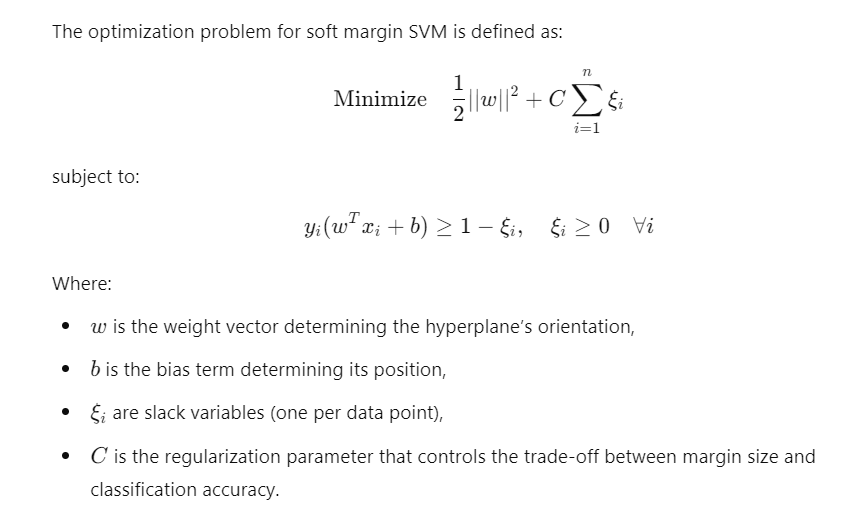

# **What is a Kernel**

In Support Vector Machines (SVM), the kernel is a mathematical function that transforms the input data into a higher-dimensional space where a linear decision boundary can be applied more effectively. The kernel function plays a crucial role in non-linear classification and enables SVM to perform well on datasets that are not linearly separable in the original feature space.

**Types of Kernels in SVM**

**Linear Kernel:**
It is used when the data is linearly separable, meaning there is a straight line (or hyperplane in higher dimensions) that can separate the classes.
The decision function is a linear combination of the input features.
The equation for a linear kernel is:
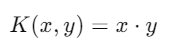

Use case: When the data is mostly linearly separable or when the number of features is much larger than the number of samples.

In Scikit-learn: Set kernel='linear'.

**Polynomial Kernel:** It computes the similarity of vectors in a feature space over polynomials of the original variables, allowing the decision boundary to take the form of a polynomial curve.
The equation for a polynomial kernel is

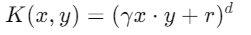

Use case: Useful for problems where the relationship between features is more complex but still can be modeled with polynomials.

In Scikit-learn: Set kernel='poly' and specify parameters like degree, gamma, and coef0 (for
𝑟).

**Radial Basis Function (RBF) Kernel (Gaussian Kernel):**
It is the most commonly used kernel in SVM for non-linear data. The RBF kernel maps data points into an infinite-dimensional space, enabling non-linear classification.
The equation for the RBF kernel is:

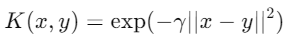

Use case: This kernel is effective for most real-world problems where the data is not linearly separable and can capture complex relationships.

In Scikit-learn: Set kernel='rbf' and tune the gamma parameter.

**Sigmoid Kernel:**
It is based on the sigmoid function and behaves like a neural network with a single hidden layer.
The equation for the sigmoid kernel is

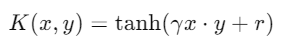

Use case: This kernel is similar to a neural network activation function and is not commonly used unless in specific applications like neural network simulation.

In Scikit-learn: Set kernel='sigmoid'.

Let's see an example:
In the following code, change the kernel from 'linear' to polynomimal, rbf and sigmoid type and run the code. Understand the difference between each kernel in svm.

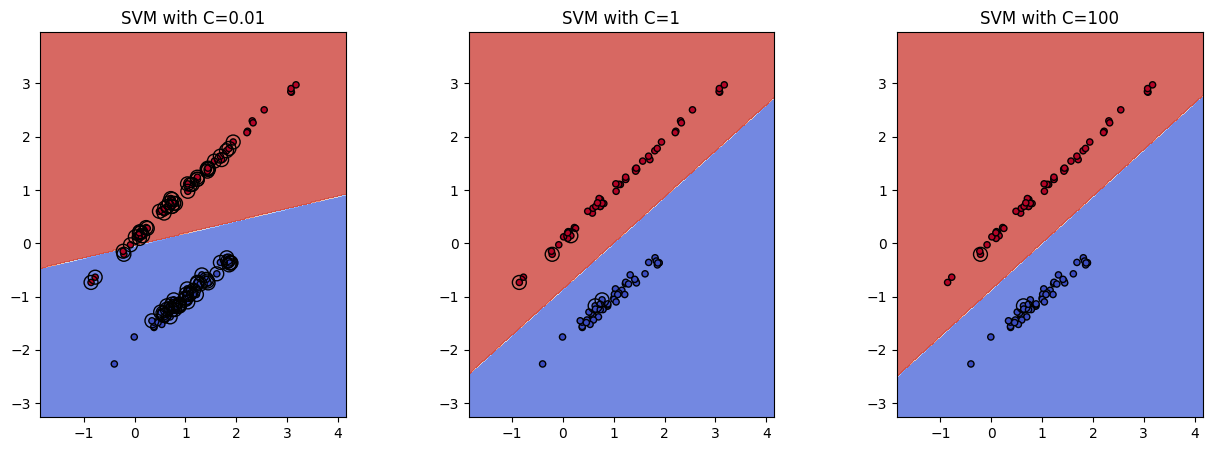

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

# Generate a simple 2D dataset with two classes
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Create a mesh grid for plotting the decision boundary
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Function to visualize the effect of different values of C
def visualize_svm(C_values):
    fig, sub = plt.subplots(1, len(C_values), figsize=(15, 5))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    # Generate the mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    for i, C in enumerate(C_values):
        clf = svm.SVC(kernel='linear', C=C)
        clf.fit(X, y)

        # Plot the decision boundary
        plot_contours(sub[i], clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot the data points
        sub[i].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

        # Highlight the support vectors
        sub[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

        sub[i].set_title(f'SVM with C={C}')
        sub[i].set_xlim(xx.min(), xx.max())
        sub[i].set_ylim(yy.min(), yy.max())

    plt.show()

# Test with different values of C to see the effect on the decision boundary
C_values = [0.01, 1, 100]
visualize_svm(C_values)


**Dataset:**
Use a real-world dataset such as the Breast Cancer Wisconsin Dataset from Scikit-learn or the UCI repository, which is suitable for binary classification.

# **Load data**

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the breast cancer dataset from sklearn and convert it into a pandas DataFrame
breast_cancer_data = load_breast_cancer()
data = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
target = pd.Series(breast_cancer_data.target, name='target')

# **Activity 1: Explore dataset and Clean [6 marks]**

In [3]:
#Write your code here

# Explore the dataset by printing first few rows

print("First few rows of the dataset:")
print(data.head())

# Print summary

print("\nDataset Summary:")
print(data.info())

# Check for missing values

print("\nMissing Values:")
print(data.isnull().sum())


First few rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  

No missing values. Already clean.

# **Activity 2- Split the dataset into training and test sets using an 80/20 split**
**[10 marks]**

In [4]:
#Write your code
# Add target column to the dataset

data['target'] = target

# Split the dataset into features (X) and target (y)

X = data.drop(columns=['target'])                                               # X should only contain features
y = target


# Split the dataset into 80% training and 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Activity 3- Apply Feature Scaling and Transform data**
**[4 marks]**

In [5]:
#Write your code here
# Feature scaling using StandardScaler

scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and test data

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Activity 4- Print first few rows of scaled data and the shapes of training and test sets**
**[10 marks]**


In [6]:
# Check the scaled data
print("\nFirst few rows of scaled training data:")
print(X_train_scaled[:5])

# Output the shapes of the training and test sets

print("\nShape of Training Set:", X_train_scaled.shape, y_train.shape)
print("Shape of Test Set:", X_test_scaled.shape, y_test.shape)


First few rows of scaled training data:
[[-1.44075296 -0.43531947 -1.36208497 -1.1391179   0.78057331  0.71892128
   2.82313451 -0.11914956  1.09266219  2.45817261 -0.26380039 -0.01605246
  -0.47041357 -0.47476088  0.83836493  3.25102691  8.43893667  3.39198733
   2.62116574  2.06120787 -1.23286131 -0.47630949 -1.24792009 -0.97396758
   0.72289445  1.18673232  4.67282796  0.9320124   2.09724217  1.88645014]
 [ 1.97409619  1.73302577  2.09167167  1.85197292  1.319843    3.42627493
   2.01311199  2.66503199  2.1270036   1.55839569  0.80531919 -0.81268678
   0.75195659  0.87716951 -0.89605315  1.18122247  0.18362761  0.60059598
  -0.31771686  0.52963649  2.17331385  1.3112795   2.08161691  2.1374055
   0.76192793  3.26560084  1.92862053  2.6989469   1.89116053  2.49783848]
 [-1.39998202 -1.24962228 -1.34520926 -1.10978518 -1.33264483 -0.30735463
  -0.36555756 -0.69650228  1.93033305  0.95437877  0.02752055  1.96305996
  -0.12095781 -0.35077918  0.57276579  0.7394992   0.32065553  0.58946

# **Activity 5- Implement Soft SVM [30 marks]**

*Hint: For this activity, you need to start writing a function*

*def train_svm_with_different_C(C_values)*


In [7]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
# Function to train and evaluate SVM with different C values
def train_svm_with_different_C(C_value):
    # Create an SVM classifier with a linear kernel and the specified C value

    print(f"Training SVM with C={C_value}")
    model = SVC(kernel='linear', C=C_value)

    # Train the classifier

    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set

    y_pred = model.predict(X_test_scaled)

    # Evaluate the accuracy of the model

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with C={C_value}: {accuracy * 100:.2f}%")

    # Return the classifier for further analysis (like visualizing support vectors)

    return model

# Experiment with different values of C

C_values = [0.1, 1, 10, 100]
svm_models = {C: train_svm_with_different_C(C) for C in C_values}

Training SVM with C=0.1
Accuracy with C=0.1: 98.25%
Training SVM with C=1
Accuracy with C=1: 95.61%
Training SVM with C=10
Accuracy with C=10: 96.49%
Training SVM with C=100
Accuracy with C=100: 92.11%


# **Activity 6- Hyperparameter Tuning with GridSearchCV**
**[20 marks]**

In [9]:
from sklearn.model_selection import GridSearchCV
# Define a parameter grid for the C parameter

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000]}                               # 6 candidates

# Initialize an SVM classifier with a linear kernel

svm_model = SVC(kernel='linear')

# Initialize GridSearchCV with the SVM model and the parameter grid

grid_search = GridSearchCV(svm_model, param_grid, cv=5, verbose=1)              # 5 folds (cv)

# Fit GridSearchCV to the scaled training data

grid_search.fit(X_train_scaled, y_train)

# Display the best parameters and the best score

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

# Evaluate the best model on the test set

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_best)
print("Test set accuracy with best C: {:.2f}%".format(accuracy * 100))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 0.1}
Best cross-validation accuracy: 0.9736
Test set accuracy with best C: 98.25%


# **Activity 7- Model Evaluation [20 marks]**

Test set accuracy with best C: 98.25%


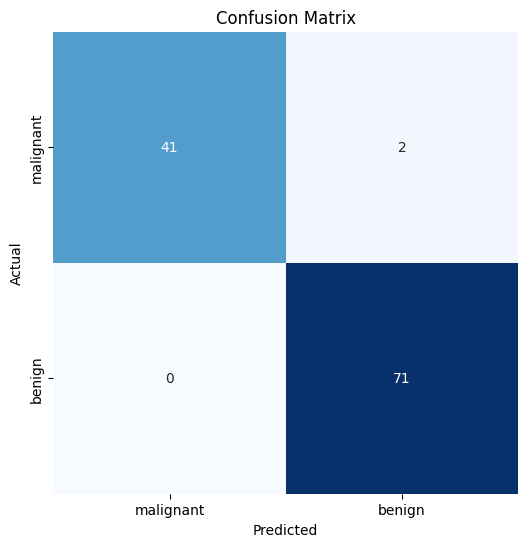

Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        43
      benign       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [10]:
# Import necessary libraries for evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the best model (from GridSearchCV) on the test set

y_pred_best = best_model.predict(X_test_scaled)

# Calculate the accuracy of the final model

accuracy = accuracy_score(y_test, y_pred_best)
print("Test set accuracy with best C: {:.2f}%".format(accuracy * 100))

# Generate the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['malignant', 'benign'], yticklabels=['malignant', 'benign'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report

print("Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=['malignant', 'benign']))
